# IST 652 Final Project - A Pantheon Exploration

# Introduction

Recorded human history has only been around for 5000 years. By understanding the makeup of Pantheon, all persons today both young and old are enriched with the knowledge of global, scientific and cultural development of humanity. The meaning of the word *Pantheon* describes a group of particularly respected, famous, or important people. Over the course of human history there have been thousands of such individuals that have made an impact on society. Due to the information age that began in the latter part of the 20th century, people all over the world now have access to the same biographies of these individuals through Wikipedia in multiple languages. What was once information of limited accessibility and supply, shelved in remote libraries, is now conveniently made available through this medium.

Credit goes to the Macro Connections group at the Massachusetts Institute of Technology Media Lab and their [Pantheon Project](https://www.kaggle.com/mit/pantheon-project). Not only was a Pantheon index made available to the general public, but a popularity index was created as well. One "barrier to entry" to this content is the number of languages available for each article. This is a key measure in determining the popularity of individuals in the Pantheon. "The simpler of the two measures, which we denote as L, is the number of different Wikipedia language editions that have an article about a historical character. The more sophisticated measure, which we name the Historical Popularity Index (HPI) corrects L by adding information on the age of the historical character, the concentration of page views among different languages, the coefficient of variation in page views, and the number of page views in languages other than English." [https://www.kaggle.com/mit/pantheon-project](https://www.kaggle.com/mit/pantheon-project)

The significance of historical figures may be debatable, but this report seeks to apply an objective measure of popularity to better understand how biographies of the Pantheon is being consumed in the current day and age. From Aristotle to Benjamin Franklin, Jesus Christ to Al Pacino, historical figures and their attributes will be measured with web analytics so that the reader may have insights into the following:

Research questions:

* Which historic characters are the most popular?
* When did they live and where are they from?
* What factors could have generated their popularity?
* Are there any observable trends in the categorical data provided?
* What associations exist between the variables in the data?
* What clusters and groupings are in the data? How do groups compare in popularity?

# Analysis

Key analysis methods used in report:
* Data Cleaning
* Sorting and subsets of the data.
* Line and bar plots.
* Multiple regression

## About the Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Loading data from .csv file
dataFileName = "data/database.csv"
isExist = os.path.isfile(dataFileName)
if isExist == True:
    dfDirtyData = pd.read_csv(dataFileName, sep=",", header=0)
else:
    print("File not found:", os.getcwd())


In [3]:
# Showing inforamtion about the dataframe
dfDirtyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
article_id                     11341 non-null int64
full_name                      11341 non-null object
sex                            11341 non-null object
birth_year                     11341 non-null object
city                           11341 non-null object
state                          2172 non-null object
country                        11308 non-null object
continent                      11311 non-null object
latitude                       10294 non-null float64
longitude                      10294 non-null float64
occupation                     11341 non-null object
industry                       11341 non-null object
domain                         11341 non-null object
article_languages              11341 non-null int64
page_views                     11341 non-null int64
average_views                  11341 non-null int64
historical_popularity_index    11341 non-null 

In [206]:
# Creating a varibale to hold fields for displaying purpose since not all will fit
columnToDisplayDirtyData = ['full_name', 'sex', 'birth_year', 'country', 'occupation','historical_popularity_index']

In [207]:
# Showing a single row of record
dfDirtyData.loc[1522]

article_id                             23671899
full_name                                Elisha
sex                                        Male
birth_year                              Unknown
city                                      Other
state                                       NaN
country                                 Unknown
continent                               Unknown
latitude                                    NaN
longitude                                   NaN
occupation                     Religious Figure
industry                               Religion
domain                             Institutions
article_languages                            41
page_views                              1338790
average_views                             32653
historical_popularity_index             25.5087
Name: 1522, dtype: object

In [208]:
# Showing the first 5 rows of the data in the data frame
dfDirtyData.loc[:,columnToDisplayDirtyData].head(5)

,full_name,sex,birth_year,country,occupation,historical_popularity_index
0,Aristotle,Male,-384,Greece,Philosopher,31.9938
1,Plato,Male,-427,Greece,Philosopher,31.9888
2,Jesus Christ,Male,-4,Israel,Religious Figure,31.8981
3,Socrates,Male,-469,Greece,Philosopher,31.6521
4,Alexander the Great,Male,-356,Greece,Military Personnel,31.5840


In [183]:
# Showing the first 5 rows of the data in the data frame
dfDirtyData.loc[:,columnToDisplayDirtyData].tail(5)

,full_name,sex,birth_year,country,occupation,historical_popularity_index
11336,Sean St Ledger,Male,1984,United Kingdom,Soccer Player,11.1346
11337,Saina Nehwal,Female,1990,India,Athlete,10.6122
11338,Rūta Meilutytė,Female,1997,Lithuania,Swimmer,10.3821
11339,Vladimír Weiss,Male,1989,Slovakia,Soccer Player,10.2495
11340,Missy Franklin,Female,1995,United States,Swimmer,9.8794


## Data Cleaning

In [209]:
# Creating a new copy of a dataframe from the original
dfCleanData = dfDirtyData.copy()

In [214]:
# Renaming historical_popularity_index to popularity (short name)
dfCleanData.rename(columns={'historical_popularity_index': 'popularity'}, inplace=True)

In [215]:
# Finding the index of a column with alpha numberic values.
def findStringValueIndex(fieldName):
    badRowIndex = [] # initialize list of problematic rows
    for idx, value in enumerate(dfCleanData[fieldName]):
        try:
            int(value)
        except:
            badRowIndex.append(idx)
    return badRowIndex

In [216]:
# List of columns to be converted into numeric data type
columnToConvert = ["article_languages", "birth_year", "latitude", "longitude", "page_views","average_views", "popularity"]
# Making sure to replace the non-numeric values to 0 before converting to numeric
# Examples: 
#           dfCleanData.loc[findStringValueIndex('latitude'), 'latitude'] = 0
# The following code block is doing similiar to the examples but 
# through the iteration of the list 
for col in columnToConvert:
    indx = []
    indx = findStringValueIndex(col)
    if len(indx) > 0 :
        dfCleanData.loc[indx, col] = 0
# Converting the columns above to numeric data type
dfCleanData[columnToConvert] = dfCleanData[columnToConvert].apply(pd.to_numeric)

In [217]:
# Looping through columns in the dataframe. 
# Replacing columns with 'object' data type from 'NaN' to 'NA'
for column in dfCleanData.columns:
    if(dfCleanData[column].dtype == 'object'):
          dfCleanData[column].fillna(value="NA", inplace=True)

In [143]:
# Showing inforamtion about the dataframe
dfCleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
article_id           11341 non-null int64
full_name            11341 non-null object
sex                  11341 non-null object
birth_year           11341 non-null int64
city                 11341 non-null object
state                11341 non-null object
country              11341 non-null object
continent            11341 non-null object
latitude             11341 non-null float64
longitude            11341 non-null float64
occupation           11341 non-null object
industry             11341 non-null object
domain               11341 non-null object
article_languages    11341 non-null int64
page_views           11341 non-null int64
average_views        11341 non-null int64
popularity           11341 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 1.5+ MB


In [189]:
# Creating a varibale to hold fields for displaying purpose since not all will fit
columnToDisplayCleanData = ['full_name', 'sex', 'birth_year', 'country', 'occupation','popularity','longitude','latitude','page_views','average_views']

In [190]:
# Showing the first 5 rows of the data in the dataset
dfCleanData.loc[:,columnToDisplayCleanData].head(5)

,full_name,sex,birth_year,country,occupation,popularity,longitude,latitude,page_views,average_views
0,Aristotle,Male,-384,Greece,Philosopher,31.9938,23.50000,40.33333,56355172,370758
1,Plato,Male,-427,Greece,Philosopher,31.9888,23.71667,37.96667,46812003,329662
2,Jesus Christ,Male,-4,Israel,Religious Figure,31.8981,34.90000,32.50000,60299092,281771
3,Socrates,Male,-469,Greece,Philosopher,31.6521,23.71667,37.96667,40307143,294213
4,Alexander the Great,Male,-356,Greece,Military Personnel,31.5840,22.51667,40.80000,48358148,350421


In [191]:
# Showing the last 5 rows of the data in the dataset
dfCleanData.loc[:,columnToDisplayCleanData].tail(5)

,full_name,sex,birth_year,country,occupation,popularity,longitude,latitude,page_views,average_views
11336,Sean St Ledger,Male,1984,United Kingdom,Soccer Player,11.1346,-1.77209,52.41290,380965,13606
11337,Saina Nehwal,Female,1990,India,Athlete,10.6122,75.71670,29.16670,2255010,86731
11338,Rūta Meilutytė,Female,1997,Lithuania,Swimmer,10.3821,23.88611,54.90000,342719,10710
11339,Vladimír Weiss,Male,1989,Slovakia,Soccer Player,10.2495,17.10972,48.14389,12479,462
11340,Missy Franklin,Female,1995,United States,Swimmer,9.8794,-118.13194,34.15611,1894716,72874


## Exploration

In [192]:
# Which historic characters are in the top ten most popular?
dfTopTenMostPopularPeople = dfCleanData.sort_values(by = ['popularity'], ascending = False)
dfTopTenMostPopularPeople = dfTopTenMostPopularPeople.head(10)
dfTopTenMostPopularPeople.loc[:,columnToDisplayCleanData]

,full_name,sex,birth_year,country,occupation,popularity,longitude,latitude,page_views,average_views
0,Aristotle,Male,-384,Greece,Philosopher,31.9938,23.50000,40.33333,56355172,370758
1,Plato,Male,-427,Greece,Philosopher,31.9888,23.71667,37.96667,46812003,329662
2,Jesus Christ,Male,-4,Israel,Religious Figure,31.8981,34.90000,32.50000,60299092,281771
3,Socrates,Male,-469,Greece,Philosopher,31.6521,23.71667,37.96667,40307143,294213
4,Alexander the Great,Male,-356,Greece,Military Personnel,31.5840,22.51667,40.80000,48358148,350421
5,Leonardo da Vinci,Male,1452,Italy,Inventor,31.4644,10.91667,43.78333,88931135,511098
6,Confucius,Male,-551,China,Philosopher,31.3705,0.00000,0.00000,22363652,116477
7,Julius Caesar,Male,-100,Italy,Politician,31.1161,12.50000,41.90000,43088745,336631
8,Homer,Male,-800,Turkey,Writer,31.1087,27.13917,38.41861,20839405,147797
9,Pythagoras,Male,-570,Greece,Philosopher,31.0691,26.83333,37.75000,26168219,229546


In [193]:
dfTotalTop10ByContinentByCountry = pd.DataFrame(dfTopTenMostPopularPeople.groupby(['country'])['article_id'].count())
dfTotalTop10ByContinentByCountry.rename(columns={'':'country','article_id': 'total_count'}, inplace=True)
dfTotalTop10ByContinentByCountry 

,total_count
country,
China,1
Greece,5
Israel,1
Italy,2
Turkey,1


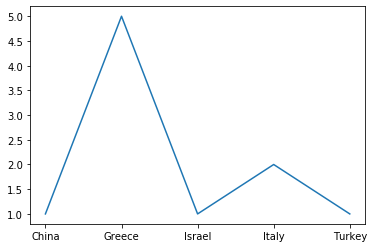

In [33]:
plt.plot(dfTotalTop10ByContinentByCountry)

In [194]:
# Which historic characters are in the top ten least popular?
dfTopTenLeastPopularPeople = dfCleanData.sort_values(by = ['popularity'], ascending = True)
dfTopTenLeastPopularPeople = dfTopTenLeastPopularPeople.head(10)
dfTopTenLeastPopularPeople.loc[:,columnToDisplayCleanData].head(10)

,full_name,sex,birth_year,country,occupation,popularity,longitude,latitude,page_views,average_views
11340,Missy Franklin,Female,1995,United States,Swimmer,9.8794,-118.13194,34.15611,1894716,72874
11339,Vladimír Weiss,Male,1989,Slovakia,Soccer Player,10.2495,17.10972,48.14389,12479,462
11338,Rūta Meilutytė,Female,1997,Lithuania,Swimmer,10.3821,23.88611,54.90000,342719,10710
11337,Saina Nehwal,Female,1990,India,Athlete,10.6122,75.71670,29.16670,2255010,86731
11336,Sean St Ledger,Male,1984,United Kingdom,Soccer Player,11.1346,-1.77209,52.41290,380965,13606
11335,Jetro Willems,Male,1994,Netherlands,Soccer Player,11.3956,4.50000,51.91667,577913,21404
11334,Rebecca Soni,Female,1987,United States,Swimmer,11.4050,-74.27588,40.26022,886815,32845
11333,Sun Yang,Male,1991,China,Swimmer,11.6234,120.16667,30.25000,491910,18920
11332,Shane Long,Male,1987,Ireland,Soccer Player,11.7174,0.00000,0.00000,799202,30739
11331,Marc Albrighton,Male,1989,United Kingdom,Soccer Player,11.7258,-1.69500,52.63300,495420,19055


In [34]:
dfTotalTop10LByContinentByCountry = pd.DataFrame(dfTopTenLeastPopularPeople.groupby(['continent', 'country','sex'])['article_id'].count())
dfTotalTop10LByContinentByCountry.rename(columns={'article_id': 'total_count'}, inplace=True)
dfTotalTop10LByContinentByCountry

total_count
continent     country        sex                
Asia          China          Male              1
              India          Female            1
Europe        Ireland        Male              1
              Lithuania      Female            1
              Netherlands    Male              1
              Slovakia       Male              1
              United Kingdom Male              2
North America United States  Female            2

In [35]:
# Getting the count by country, occupation, industry, and domain
dfTotalByCountryByIndustry = pd.DataFrame(dfCleanData.groupby(['industry','occupation'])['article_id'].count())
# Renaming the default column name the dataframe created to a meaningfull name
dfTotalByCountryByIndustry.rename(columns={'article_id': 'total_count'}, inplace=True)
dfTotalByCountryByIndustry.sort_values(by = ['total_count'], ascending = False).head(20)

total_count
industry          occupation                     
Government        Politician                 2530
Film And Theatre  Actor                      1193
Team Sports       Soccer Player              1064
Language          Writer                      954
Religion          Religious Figure            518
Music             Singer                      437
                  Musician                    381
Philosophy        Philosopher                 281
Natural Sciences  Physicist                   268
Music             Composer                    225
Military          Military Personnel          224
Natural Sciences  Chemist                     220
Fine Arts         Painter                     178
Film And Theatre  Film Director               177
Individual Sports Tennis Player               161
Math              Mathematician               157
Medicine          Physician                   142
Natural Sciences  Biologist                   141
Government        Nobleman                    116
Activism          Social Activist             114

In [36]:
# Getting the count by countinent and by country
dfTotalByContinentByCountry = pd.DataFrame(dfCleanData.groupby(['continent', 'country'])['article_id'].count())
# Renaming the default column name the dataframe created to a meaningfull name
dfTotalByContinentByCountry.rename(columns={'article_id': 'total_count'}, inplace=True)
dfTotalByContinentByCountry.sort_values(by = ['total_count'], ascending = False).head(10)

total_count
continent     country                    
North America United States          2168
Europe        United Kingdom         1145
              France                  866
              Italy                   808
              Germany                 747
Unknown       Unknown                 405
Europe        Russia                  374
              Spain                   296
Asia          Turkey                  202
Europe        Poland                  173

In [38]:
# Getting the count by countinent
dfTotalByContinent = pd.DataFrame(dfCleanData.groupby(['continent'])['article_id'].count())
# Renaming the default column name the dataframe created to a meaningfull name
dfTotalByContinent.rename(columns={'article_id': 'total_count'}, inplace=True)
dfTotalByContinent.sort_values(by = ['total_count'], ascending = False)

,total_count
continent,
Europe,6368
North America,2439
Asia,1188
Africa,419
Unknown,408
South America,366
Oceania,123


## Modeling

# Results

# Conclusion